In [ ]:
# ..... try integration with scib tools ..... #
# building with info from   https://scib.readthedocs.io/en/latest/api.html

In [1]:
import scgen
import scanpy 
import pandas as pd
import numpy as np
import scib

/home/suresh/miniconda3/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'libc10_cuda.so: cannot open shared object file: No such file or directory'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
Global seed set to 0
/home/suresh/miniconda3/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/home/suresh/miniconda3/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.log

In [2]:
adata1 = scanpy.read_h5ad("stage9_sample1_hvg.h5ad")
adata2 = scanpy.read_h5ad("stage9_sample2_hvg.h5ad")
adata3 = scanpy.read_h5ad("stage9_sample3_hvg.h5ad")

# List of datasets:
adatas = [ adata1, adata2, adata3 ]

/home/suresh/miniconda3/lib/python3.9/site-packages/anndata/_io/h5ad.py:238: OldFormatWarning: Element '/X' was written without encoding metadata.
  d[k] = read_elem(f[k])
/home/suresh/miniconda3/lib/python3.9/site-packages/anndata/_io/specs/methods.py:590: OldFormatWarning: Element '/obs/orig.ident' was written without encoding metadata.
  return read_elem(dataset)
/home/suresh/miniconda3/lib/python3.9/site-packages/anndata/_io/specs/methods.py:590: OldFormatWarning: Element '/obs/nCount_RNA' was written without encoding metadata.
  return read_elem(dataset)
/home/suresh/miniconda3/lib/python3.9/site-packages/anndata/_io/specs/methods.py:590: OldFormatWarning: Element '/obs/nFeature_RNA' was written without encoding metadata.
  return read_elem(dataset)
/home/suresh/miniconda3/lib/python3.9/site-packages/anndata/_io/specs/methods.py:590: OldFormatWarning: Element '/obs/log10GenesPerUMI' was written without encoding metadata.
  return read_elem(dataset)
/home/suresh/miniconda3/lib/pyth

In [3]:
alldata = scanpy.concat(adatas)
alldata.layers['counts']=alldata.raw.copy()
alldata

AnnData object with n_obs × n_vars = 32722 × 6312
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'log10GenesPerUMI', 'stage', 'sample', 'S.Score', 'G2M.Score', 'Phase', 'old.ident', 'RNA_snn_res.0.5', 'seurat_clusters', 'doublet', 'dataset', 'consensus_type'
    obsm: 'X_pca', 'X_umap'
    layers: 'counts'

In [4]:
# hvg_df = scanpy.pp.highly_variable_genes(alldata, n_top_genes=2000, inplace=False)
# hvg_list = scib.preprocessing.hvg_batch(alldata, batch_key='sample', target_genes=2000)
alldata.obs['sample'] = alldata.obs['sample'].astype('string')

In [5]:
alldata_corrected = scib.ig.scgen(alldata, batch="sample", cell_type='consensus_type')

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 1/100:   0%|                                                     | 0/100 [00:00<?, ?it/s]

/home/suresh/miniconda3/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/suresh/miniconda3/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 2/100:   1%|▎                         | 1/100 [00:31<51:09, 31.00s/it, loss=262, v_num=1]

/home/suresh/miniconda3/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/suresh/miniconda3/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 3/100:   2%|▌                         | 2/100 [01:02<50:44, 31.07s/it, loss=256, v_num=1]

/home/suresh/miniconda3/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/suresh/miniconda3/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 4/100:   3%|▊                         | 3/100 [01:32<49:37, 30.70s/it, loss=255, v_num=1]

/home/suresh/miniconda3/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/suresh/miniconda3/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 5/100:   4%|█                         | 4/100 [02:02<48:37, 30.39s/it, loss=238, v_num=1]

/home/suresh/miniconda3/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/suresh/miniconda3/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 6/100:   5%|█▎                        | 5/100 [02:31<47:25, 29.95s/it, loss=220, v_num=1]

/home/suresh/miniconda3/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/suresh/miniconda3/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 7/100:   6%|█▌                        | 6/100 [03:01<46:55, 29.95s/it, loss=238, v_num=1]

/home/suresh/miniconda3/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/suresh/miniconda3/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 8/100:   7%|█▊                        | 7/100 [03:31<46:34, 30.05s/it, loss=239, v_num=1]

/home/suresh/miniconda3/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/suresh/miniconda3/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 9/100:   8%|██                        | 8/100 [04:01<45:51, 29.91s/it, loss=226, v_num=1]

/home/suresh/miniconda3/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/suresh/miniconda3/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 10/100:   9%|██▎                      | 9/100 [04:31<45:27, 29.98s/it, loss=227, v_num=1]

/home/suresh/miniconda3/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/suresh/miniconda3/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 11/100:  10%|██▍                     | 10/100 [05:01<45:12, 30.14s/it, loss=239, v_num=1]

/home/suresh/miniconda3/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/suresh/miniconda3/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 12/100:  11%|██▋                     | 11/100 [05:32<44:57, 30.31s/it, loss=230, v_num=1]

/home/suresh/miniconda3/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/suresh/miniconda3/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 13/100:  12%|██▉                     | 12/100 [06:03<44:31, 30.36s/it, loss=237, v_num=1]

/home/suresh/miniconda3/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/suresh/miniconda3/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 14/100:  13%|███                     | 13/100 [06:33<44:00, 30.35s/it, loss=232, v_num=1]

/home/suresh/miniconda3/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/suresh/miniconda3/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 15/100:  14%|███▎                    | 14/100 [07:02<43:09, 30.11s/it, loss=229, v_num=1]

/home/suresh/miniconda3/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/suresh/miniconda3/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 16/100:  15%|███▌                    | 15/100 [07:32<42:13, 29.81s/it, loss=231, v_num=1]

/home/suresh/miniconda3/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/suresh/miniconda3/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 17/100:  16%|███▊                    | 16/100 [07:58<40:13, 28.73s/it, loss=240, v_num=1]

/home/suresh/miniconda3/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/suresh/miniconda3/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 18/100:  17%|████                    | 17/100 [08:27<40:00, 28.92s/it, loss=226, v_num=1]

/home/suresh/miniconda3/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/suresh/miniconda3/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 19/100:  18%|████▎                   | 18/100 [08:56<39:29, 28.90s/it, loss=224, v_num=1]

/home/suresh/miniconda3/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/suresh/miniconda3/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 20/100:  19%|████▌                   | 19/100 [09:23<38:21, 28.42s/it, loss=229, v_num=1]

/home/suresh/miniconda3/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/suresh/miniconda3/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 21/100:  20%|████▊                   | 20/100 [09:54<38:42, 29.03s/it, loss=222, v_num=1]

/home/suresh/miniconda3/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/suresh/miniconda3/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 22/100:  21%|█████                   | 21/100 [10:20<37:07, 28.19s/it, loss=226, v_num=1]

/home/suresh/miniconda3/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/suresh/miniconda3/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 23/100:  22%|█████▎                  | 22/100 [10:49<37:07, 28.56s/it, loss=227, v_num=1]

/home/suresh/miniconda3/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/suresh/miniconda3/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 24/100:  23%|█████▌                  | 23/100 [11:20<37:14, 29.02s/it, loss=243, v_num=1]

/home/suresh/miniconda3/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/suresh/miniconda3/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 25/100:  24%|█████▊                  | 24/100 [11:49<36:53, 29.13s/it, loss=221, v_num=1]

/home/suresh/miniconda3/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/suresh/miniconda3/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 26/100:  25%|██████                  | 25/100 [12:19<36:46, 29.42s/it, loss=223, v_num=1]

/home/suresh/miniconda3/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/suresh/miniconda3/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 26/100:  26%|██████▏                 | 26/100 [12:46<36:20, 29.46s/it, loss=225, v_num=1]
Monitored metric elbo_validation did not improve in the last 25 records. Best score: 1072.081. Signaling Trainer to stop.


/home/suresh/miniconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1118: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


IndexError: Unknown indexer <BooleanArray>
[True, True, True, True, False, False, False, False, False]
Length: 9, dtype: boolean of type <class 'pandas.core.arrays.boolean.BooleanArray'>

In [6]:
alldata_corrected

NameError: name 'alldata_corrected' is not defined

In [46]:
scanpy.pp.neighbors(alldata_corrected, use_rep="corrected_latent")
scanpy.tl.umap(alldata_corrected)
scanpy.tl.leiden(
    alldata_corrected, key_added="clusters", n_iterations=2
)

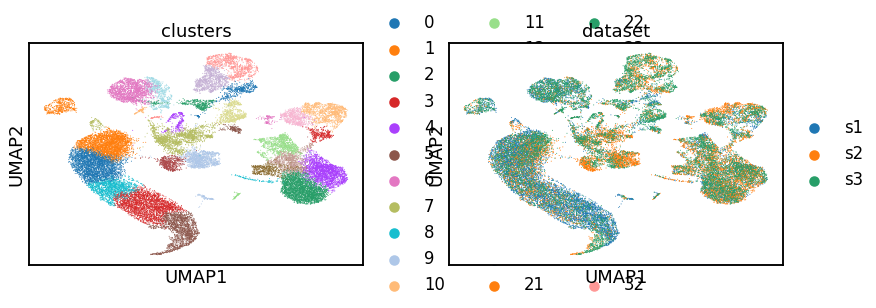

In [47]:
scanpy.pl.umap(
    alldata_corrected, color=["clusters", "dataset"], palette=scanpy.pl.palettes.default_20
)

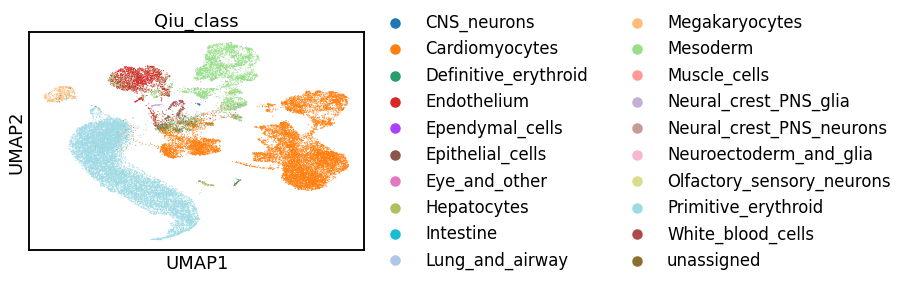

In [48]:
# scanpy.pl.umap(
#     alldata_corrected, color="KS_class", palette=scanpy.pl.palettes.default_20
# )
scanpy.pl.umap(
    alldata_corrected, color="Qiu_class", palette=scanpy.pl.palettes.default_20
)

In [49]:
# get dataframe of main metrics
df1 = scib.metrics.metrics(alldata, alldata_corrected, batch_key='sample', label_key='Qiu_class', 
                      embed='corrected_latent', cluster_key='clusters', ari_=True, nmi_=True, silhouette_=True,
                    graph_conn_=True, kBET_=True)

df2 = scib.metrics.metrics(alldata, alldata_corrected, batch_key='sample', label_key='KS_class', 
                      embed='corrected_latent', cluster_key='clusters', ari_=True, nmi_=True, silhouette_=True,
                    graph_conn_=True, kBET_=True)

/home/suresh/miniconda3/lib/python3.9/site-packages/scib/metrics/metrics.py:293: DeprecationWarning: Call to deprecated function (or staticmethod) opt_louvain.
  res_max, nmi_max, nmi_all = opt_louvain(


NMI...
ARI...
Silhouette score...
Graph connectivity...
kBET...


/home/suresh/miniconda3/lib/python3.9/site-packages/scib/metrics/kbet.py:229: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()


Adding diffusion to step 4
Adding diffusion to step 5


/home/suresh/miniconda3/lib/python3.9/site-packages/scib/metrics/kbet.py:229: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()


Adding diffusion to step 4
Adding diffusion to step 5


/home/suresh/miniconda3/lib/python3.9/site-packages/scib/metrics/kbet.py:229: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()


Adding diffusion to step 4


/home/suresh/miniconda3/lib/python3.9/site-packages/scib/metrics/kbet.py:229: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()
/home/suresh/miniconda3/lib/python3.9/site-packages/scib/metrics/kbet.py:229: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()


Adding diffusion to step 4


/home/suresh/miniconda3/lib/python3.9/site-packages/scib/metrics/kbet.py:229: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()


Adding diffusion to step 4
Adding diffusion to step 5
Adding diffusion to step 6
Adding diffusion to step 7


/home/suresh/miniconda3/lib/python3.9/site-packages/scib/metrics/kbet.py:229: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()
/home/suresh/miniconda3/lib/python3.9/site-packages/scib/metrics/kbet.py:229: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()


Adding diffusion to step 4
Adding diffusion to step 5


/home/suresh/miniconda3/lib/python3.9/site-packages/scib/metrics/kbet.py:229: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()


Adding diffusion to step 4


/home/suresh/miniconda3/lib/python3.9/site-packages/scib/metrics/kbet.py:229: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()


Intestine consists of a single batch or is too small. Skip.
Lung_and_airway consists of a single batch or is too small. Skip.
Eye_and_other consists of a single batch or is too small. Skip.


/home/suresh/miniconda3/lib/python3.9/site-packages/scib/metrics/metrics.py:293: DeprecationWarning: Call to deprecated function (or staticmethod) opt_louvain.
  res_max, nmi_max, nmi_all = opt_louvain(


NMI...
ARI...
Silhouette score...
Graph connectivity...
kBET...
Adding diffusion to step 4
Adding diffusion to step 5
Adding diffusion to step 6


/home/suresh/miniconda3/lib/python3.9/site-packages/scib/metrics/kbet.py:229: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()


Adding diffusion to step 4
Adding diffusion to step 5
Adding diffusion to step 6
Adding diffusion to step 7
Adding diffusion to step 8


/home/suresh/miniconda3/lib/python3.9/site-packages/scib/metrics/kbet.py:229: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()


Adding diffusion to step 4


/home/suresh/miniconda3/lib/python3.9/site-packages/scib/metrics/kbet.py:229: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()


Adding diffusion to step 4


/home/suresh/miniconda3/lib/python3.9/site-packages/scib/metrics/kbet.py:229: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()


Adding diffusion to step 4


/home/suresh/miniconda3/lib/python3.9/site-packages/scib/metrics/kbet.py:229: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()


Adding diffusion to step 4


/home/suresh/miniconda3/lib/python3.9/site-packages/scib/metrics/kbet.py:229: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()


Adding diffusion to step 4
Adding diffusion to step 5
Adding diffusion to step 6
Adding diffusion to step 7


/home/suresh/miniconda3/lib/python3.9/site-packages/scib/metrics/kbet.py:229: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()
/home/suresh/miniconda3/lib/python3.9/site-packages/scib/metrics/kbet.py:229: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()


In [50]:
# save metrics from scib
df1.to_csv('stage9_scGEN_hvg_matrics_Qiu.csv')
df2.to_csv('stage9_scGEN_hvg_matrics_KS.csv')

In [51]:
# save anndata object
alldata_corrected.write_h5ad('stage9_scGEN_hvg.h5ad')

# save embeddings and clusters from Scanorama
np.savetxt('stage9_scGEN_pca_hvg.csv', alldata_corrected.obsm['corrected_latent'], delimiter=",")
np.savetxt('stage9_scGEN_umap_hvg.csv', alldata_corrected.obsm['X_umap'], delimiter=",")
pd.DataFrame(alldata_corrected.obs['clusters']).to_csv('stage9_scGEN_clusters_hvg.csv')

In [ ]:
# plots

In [39]:
# alldata_corrected = scanpy.read_h5ad("stage16_scGEN_hvg.h5ad")

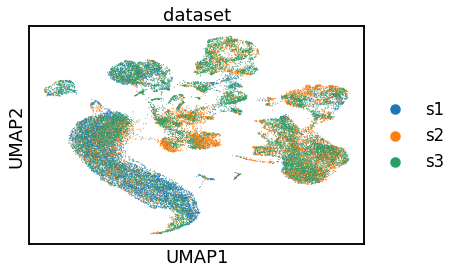

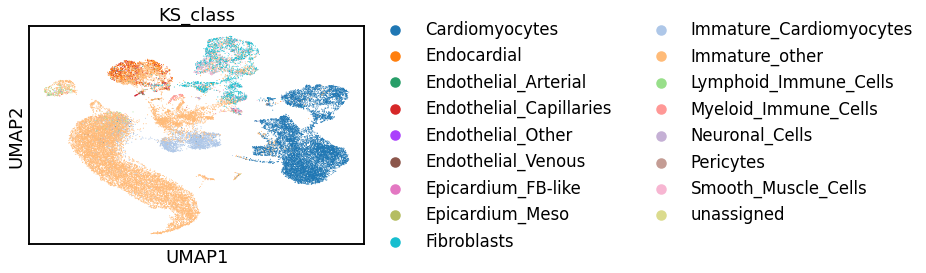

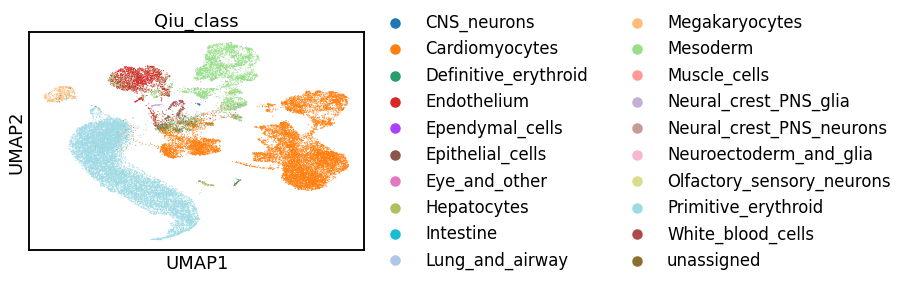

In [52]:
scanpy.pl.umap(alldata_corrected, color="dataset", palette=scanpy.pl.palettes.default_20, 
               save='stage9_scgen_batch.png')
scanpy.pl.umap(alldata_corrected, color="KS_class", palette=scanpy.pl.palettes.default_20,
               save='stage9_scgen_KS.png')
scanpy.pl.umap(alldata_corrected, color="Qiu_class", palette=scanpy.pl.palettes.default_20,
               save='stage9_scgen_Qiu.png')